In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import copy
import shutil

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%load_ext autoreload
%autoreload 2

from gaaem_utils import *

In [4]:
data_dir='/Users/mp/Python/ga-aem-emrld/examples/bhmar-skytem/galeisbstdem/output-txheight'

In [5]:
model=read_GALEI_files(data_dir,
                       data_prefix="inversion.output", 
                       data_suffix=".asc")

Reading files:['/Users/mp/Python/ga-aem-emrld/examples/bhmar-skytem/galeisbstdem/output-txheight/inversion.output.0002.asc', '/Users/mp/Python/ga-aem-emrld/examples/bhmar-skytem/galeisbstdem/output-txheight/inversion.output.0001.asc', '/Users/mp/Python/ga-aem-emrld/examples/bhmar-skytem/galeisbstdem/output-txheight/inversion.output.0000.asc']


In [6]:
make_XYZ_model(model)

<IPython.core.display.Javascript object>


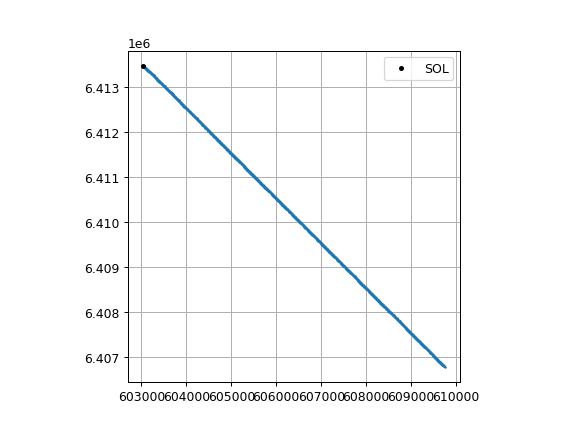

In [7]:
fig, ax = plt.subplots()
ax.plot(model["flightlines"].easting, model["flightlines"].northing, ".-", ms=2)
ax.plot(model["flightlines"].easting.iloc[0], model["flightlines"].northing.iloc[0], "k.", label="SOL")
ax.set_aspect("equal")
ax.grid()
ax.legend()

<IPython.core.display.Javascript object>


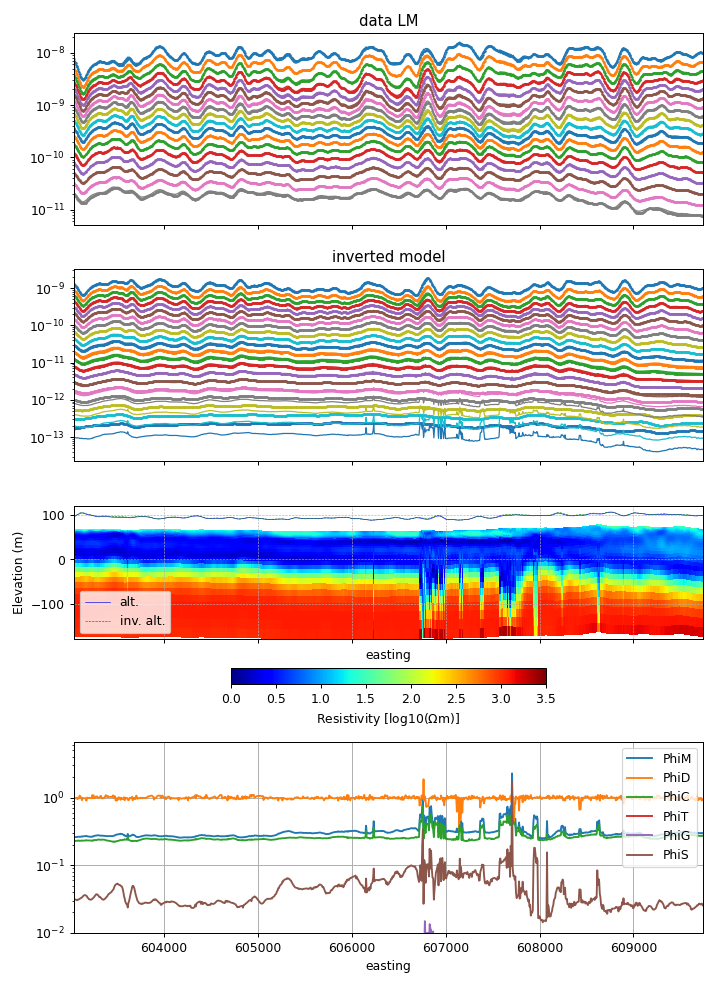

/Users/mp/Python/ga-aem_utils/venvGAAEM/lib/python3.8/site-packages/gaaem_utils/__init__.py:69: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pm=ax.pcolormesh(local_x, depth, image_data, cmap=cmap, shading='auto', vmin=clim[0], vmax=clim[1] )


(0.01, 6.735665821889988)

In [8]:
fig, ax = GALEI_invQCplot(model, keyx="easting")
#ylim=ax[2].get_ylim()
#ax[2].set_ylim([0, ylim[1]])
ylim=ax[3].get_ylim()
ax[3].set_ylim([1e-2, ylim[1]])

In [9]:
(model["flightlines"].input_tx_height-model['flightlines'].inverted_tx_height).describe()

count    1000.000000
mean       -0.496510
std         0.506977
min        -2.440000
25%        -0.800000
50%        -0.420000
75%        -0.107500
max         0.510000
dtype: float64

In [10]:
model["layer_data"]["conductivity"].shape

(1000, 30)